KNN-WINE CLASSIFICATION

In [2]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,\
confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [3]:
data = load_wine()

In [4]:
df = pd.DataFrame(data['data'],columns=data['feature_names'])

df['target'] = data['target']

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [5]:
X_train,X_test,y_train,y_test=train_test_split(data['data'],
                                              data['target'],
                                              random_state=42,
                                              test_size=0.2)
model=KNeighborsClassifier(n_neighbors=5)


In [6]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [7]:
model.score(X_train,y_train)

0.7535211267605634

In [8]:
y_pred=model.predict(X_test)

In [9]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        14
           1       0.79      0.79      0.79        14
           2       0.38      0.38      0.38         8

    accuracy                           0.72        36
   macro avg       0.67      0.67      0.67        36
weighted avg       0.72      0.72      0.72        36



In [10]:
cm = confusion_matrix(y_test,y_pred)

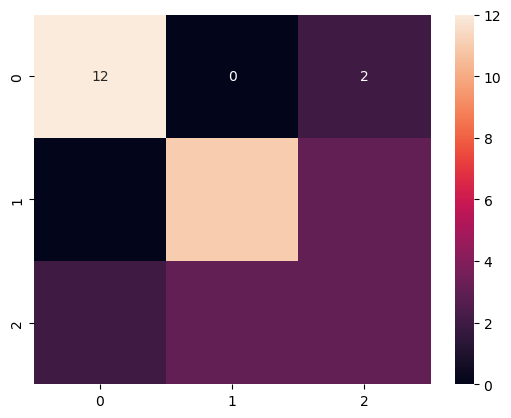

In [11]:
sns.heatmap(cm,annot=True,fmt = '.2g')
plt.show()

In [12]:
import time
max_score =0
all_score=[]
all_k=[]
for i in range(1,16):
    
    X_train,X_test,y_train,y_test=train_test_split(data['data'],
                                              data['target'],
                                              random_state=32,
                                              test_size=0.2)
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    if score>max_score:
        max_score=score
        
        print(f'value of K is :{i} and score is {score}')
        display(clear=True)
    all_score.append(score)
    all_k.append(i)
    time.sleep(1)

value of K is :6 and score is 0.8333333333333334


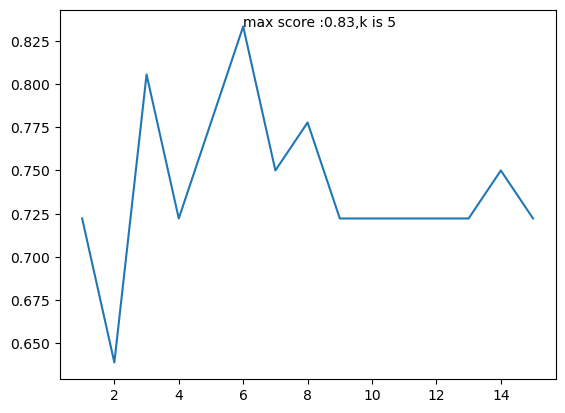

In [13]:
plt.plot(range(1,16),all_score)
k_index=np.argmax(all_score)
plt.annotate(text=f'max score :{round(max(all_score),2)},k is {k_index}',xy=(6,max(all_score)))
plt.show()

PCA-CALIFORNIA HOUSING

In [15]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
california_housing = fetch_california_housing()
data = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
data['target'] = california_housing.target

data.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
from sklearn.preprocessing import StandardScaler
data.isnull().sum()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

scaled_data[:5]

array([[ 2.34476576,  0.98214266,  0.62855945, -0.15375759, -0.9744286 ,
        -0.04959654,  1.05254828, -1.32783522,  2.12963148],
       [ 2.33223796, -0.60701891,  0.32704136, -0.26333577,  0.86143887,
        -0.09251223,  1.04318455, -1.32284391,  1.31415614],
       [ 1.7826994 ,  1.85618152,  1.15562047, -0.04901636, -0.82077735,
        -0.02584253,  1.03850269, -1.33282653,  1.25869341],
       [ 0.93296751,  1.85618152,  0.15696608, -0.04983292, -0.76602806,
        -0.0503293 ,  1.03850269, -1.33781784,  1.16510007],
       [-0.012881  ,  1.85618152,  0.3447108 , -0.03290586, -0.75984669,
        -0.08561576,  1.03850269, -1.33781784,  1.17289952]])

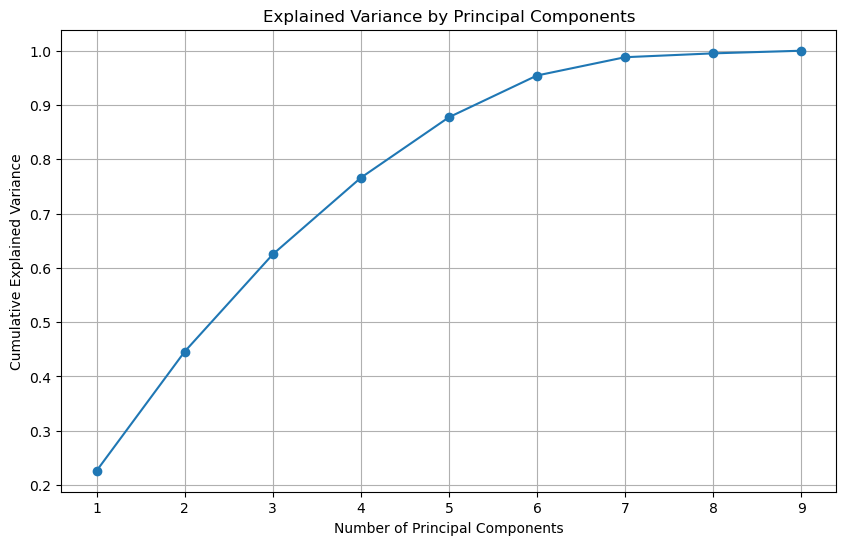

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA()
pca.fit(scaled_data)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()


In [27]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [29]:
pca.explained_variance_ratio_

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

In [ ]:
pca.n_components_

In [ ]:
X_pca